<a href="https://colab.research.google.com/github/Bart-del/studies-machine-learning/blob/main/Zadanie_6_B_Wysocki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Zadanie 6 - Problem Nadmiernego dopasowania

**<h3>Część podstawowa**

Plik data6.tsv zawiera pewne dane. Zastosuj do nich regresję wielomianową:

    pierwszego stopnia (funkcja liniowa)
    drugiego stopnia (funkcja kwadratowa)
    piątego stopnia (wielomian 5. stopnia)

Uzyskane krzywe regresji przedstaw na wykresie.

Czy w którymś z powyższych przypadków występuje zjawisko nadmiernego dopasowania?

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Saving data6.tsv to data6.tsv


In [33]:
import sklearn as sk
from scipy import stats
from sklearn.linear_model import LinearRegression

<h2>Wczytanie danych

In [25]:
import csv
reader = csv.reader(open('data6.tsv', encoding='utf-8'), delimiter='\t')
data = pd.DataFrame(reader)
data = data.to_numpy()
data = data.astype("float")

In [137]:
m, n_plus_1 = data.shape
n = n_plus_1 - 1

y = data[:,0]
Xn = data[:,0:n]
Xn /= np.amax(Xn, axis=0)
Xn2 = np.power(Xn, 2)
Xn2 /= np.amax(Xn2, axis=0)
Xn5 = np.power(Xn, 5)
Xn5 /= np.amax(Xn5, axis=0)

X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2), axis=1)).reshape(m, 2 * n + 1)
X3 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2, Xn5), axis=1)).reshape(m, 3 * n + 1)

In [129]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

In [130]:
model1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
model2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
model5.fit(X3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X2 = np.sum(X2,axis=1)
X3 = np.sum(X3,axis=1)

In [181]:
X = np.array(X).ravel()
X2 = np.array(X2).ravel()
X3 = np.array(X3).ravel()

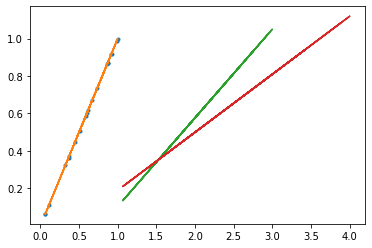

In [187]:
from numpy.polynomial.polynomial import polyfit

b1, m1 = polyfit(X, y, 1)
b2, m2 = polyfit(X2, y, 1)
b3, m3 = polyfit(X3, y, 1)

plt.plot(X, y, '.')
plt.plot(X, b1 + m1 * X, '-')
plt.plot(X2, b2 + m2 * X2, '-')
plt.plot(X3, b3 + m3 * X3, '-')
plt.show()

Nadmiene dopasowanie wytępuje w funkcji lionwej pierwszego stopnia.